
# nb20230606_133300_human_linear_regression_for_photometry_signals.ipynb

- Signals are low-pass filtered for 20 Hz
- Then obtained $\frac{\Delta F}{F} = \frac{F - F_0}{F_0}$ using the ultraslow component (0.001 Hz) of the signal as $F_0$
- Created waveform averages of $\frac{\Delta F}{F}$ using Spike2 for 3 triggers
- Manually and visually fitted the red channels curves to green channel curves
- Obtained YHigh() and YLow() values for red and green channels after overlaying
- Plotted the YRange values of red against those of green
- They lined up really nicely.
- So I did the linear regression for the 6 points, obtaining the slope and intercept
- Using the parameters on red channel data, I created a virtual channel to estiamte the motion artefacts in green channel based on red channel data.
- By subtraction of the motion artefact estimate, I created a Corrected data.
- This human eye-based linear regression seems outperfoming any of the three methods I have been trying.


In [ ]:
import os

nb_name = "nb20230606_133300_human_linear_regression_for_photometry_signals.ipynb" #TODO change this

basename, ext = os.path.splitext(nb_name)
input_path = os.path.join(os.getcwd(), nb_name)

!jupyter nbconvert "{input_path}" --to="python" --output="{basename}"

Text(0, 0.5, 'Green YRange')

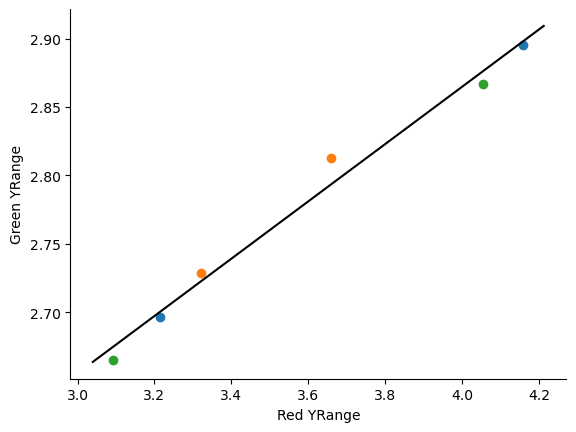

In [8]:



from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np

green1 = [2.6966825397921266, 2.8957168760433984]
red1 = [3.215262815616362, 4.159220908646116]


green2 = [2.7284173004504115, 2.8128797849579037]
red2 = [3.3205134999210313, 3.659143364262948]


green3 = [2.6653136363206817, 2.8666050089264163]
red3 = [3.0929395715531802, 4.0542862243303315]

Y = green1 + green2 + green3
X = red1 + red2 + red3

slope, intercept, r_value, p_value, std_err = linregress(X, Y)


fig, ax = plt.subplots()
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams["legend.frameon"] = False

plt.plot(red1, green1, 'o')
plt.plot(red2, green2, 'o')
plt.plot(red3, green3, 'o')

XLim = plt.xlim()

x = np.linspace(XLim[0], XLim[1], 500)
y = x * slope + intercept

plt.plot(x, y, 'k')

plt.xlabel('Red YRange')
plt.ylabel('Green YRange')



In [7]:
print(slope)
print(intercept)

0.20950242199721064
2.026837802120734


kms058-2023-03-24-151254


<img src="2023-06-06 13 16 40.png" alt="Alternative text" />